Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.preprocessing import StandardScaler

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


importing the dataset

In [2]:
movies=pd.read_csv("C:/Users/asus/Downloads/tmdb_5000_movies.csv")
credits=pd.read_csv("C:/Users/asus/Downloads/tmdb_5000_credits.csv")

###### Data Analysis

In [3]:
#show top 5 datapoints of dataset
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
#show top 5 datapoints of dataset
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
#show all statistical data of dataframe 'movies' columns
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
#show all statistical data of dataframe "credits' columns
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [7]:
# show the information of dtype, Non-Null count of movies dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:
#Show the columns of movies dataframe
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [9]:
#show the information stored in genres
movies.genres[0]

#change Actual Output into Expected Output 
#Actual Output -> '[{"id": 28, "name": "Action"}, 
#                     {"id": 12, "name": "Adventure"},
#                     {"id": 14, "name": "Fantasy"}, 
#                     {"id": 878, "name": "Science Fiction"}]'

#Expected Output -> ["Action",'Adventure','Fantasy',"Science Fiction"]


'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [10]:
#Testing code for single datapoint
# val=re.sub('{.*?name":|}',"",movies.genres[0])
# eval(val)
#output->['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [11]:
#Cleaning the genres column
import warnings
warnings.filterwarnings('ignore')

for i,k in zip(movies.genres,range(len(movies.genres))):
    val=re.sub('{.*?name":|}',"",i)
    movies.genres[k]=eval(val)

In [12]:
movies[['genres']].head()

,genres
0,"[Action, Adventure, Fantasy, Science Fiction]"
1,"[Adventure, Fantasy, Action]"
2,"[Action, Adventure, Crime]"
3,"[Action, Crime, Drama, Thriller]"
4,"[Action, Adventure, Science Fiction]"


In [13]:
#show first data value of keywords column
movies.keywords[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [14]:
#show first data value of production_companies column
movies.production_companies[0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [15]:
#show first data value of production_countries column
movies.production_countries[0]

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

In [16]:
#show first data value of spoken_languages column
movies.spoken_languages[0]

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

#### Cleaning the column 
#### keywords,production_countries,production_companies,spoken_languages

In [17]:
#keywords column testing of first data value
a=eval(movies.keywords[0])
for i in range(len(a)):
    print(a[i]['name'])

culture clash
future
space war
space colony
society
space travel
futuristic
romance
space
alien
tribe
alien planet
cgi
marine
soldier
battle
love affair
anti war
power relations
mind and soul
3d


In [18]:
#keywords column cleaning
import warnings
warnings.filterwarnings('ignore')

for i,k in zip(movies.keywords,range(len(movies.keywords))):
    a=eval(i)
    movies.keywords[k]=[a[j]['name'] for j in range(len(a))]

In [19]:
#keywords column value 
movies[['keywords']].head()

,keywords
0,"[culture clash, future, space war, space colon..."
1,"[ocean, drug abuse, exotic island, east india ..."
2,"[spy, based on novel, secret agent, sequel, mi..."
3,"[dc comics, crime fighter, terrorist, secret i..."
4,"[based on novel, mars, medallion, space travel..."


In [20]:
#production_countries column testing of first data value
a=eval(movies.production_countries[0])
for i in range(len(a)):
    print(a[i]['name'])


United States of America
United Kingdom


In [21]:
#production_countries column cleaning
import warnings
warnings.filterwarnings('ignore')

for i,k in zip(movies.production_countries,range(len(movies.production_countries))):
    a=eval(i)
    movies.production_countries[k]=[a[j]['name'] for j in range(len(a))]

In [22]:
#production_countries column value
movies[['production_countries']].head()

,production_countries
0,"[United States of America, United Kingdom]"
1,[United States of America]
2,"[United Kingdom, United States of America]"
3,[United States of America]
4,[United States of America]


In [23]:
# production_companies column testing of first data value
a=eval(movies.production_companies[0])
for i in range(len(a)):
    print(a[i]['name'])

Ingenious Film Partners
Twentieth Century Fox Film Corporation
Dune Entertainment
Lightstorm Entertainment


In [24]:
# production_companies column cleaning
import warnings
warnings.filterwarnings('ignore')

for i,k in zip(movies.production_companies,range(len(movies.production_companies))):
    a=eval(i)
    movies.production_companies[k]=[a[j]['name'] for j in range(len(a))]

In [25]:
# production_companies column value
movies[['production_companies']].head()

,production_companies
0,"[Ingenious Film Partners, Twentieth Century Fo..."
1,"[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,"[Columbia Pictures, Danjaq, B24]"
3,"[Legendary Pictures, Warner Bros., DC Entertai..."
4,[Walt Disney Pictures]


In [26]:
#spoken_language column testing of first data value
a=eval(movies.spoken_languages[0])
for i in range(len(a)):
    print(a[i]['name'])

English
Español


In [27]:
#spoken_language column cleaning
import warnings
warnings.filterwarnings('ignore')

for i,k in zip(movies.spoken_languages,range(len(movies.spoken_languages))):
    a=eval(i)
    movies.spoken_languages[k]=[a[j]['name'] for j in range(len(a))]

In [28]:
#spoken_language column value
movies[['spoken_languages']].head()

,spoken_languages
0,"[English, Español]"
1,[English]
2,"[Français, English, Español, Italiano, Deutsch]"
3,[English]
4,[English]


In [29]:
#show top 2 datapoints of dataset
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [30]:
# i want to see random row of movie dataframe
movies.iloc[140]

budget                                                          150000000
genres                                          [Action, Drama, Thriller]
homepage                                                              NaN
id                                                                 117251
keywords                [usa president, conspiracy, secret service, th...
original_language                                                      en
original_title                                           White House Down
overview                Capitol Policeman John Cale has just been deni...
popularity                                                      39.004588
production_companies    [Columbia Pictures, Centropolis Entertainment,...
production_countries                           [United States of America]
release_date                                                   2013-06-27
revenue                                                         205366737
runtime                               

In [31]:
#Checking total no. of null value in each column of movies dataframe
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [32]:
#drop the columns Homepage
movies.drop('homepage',axis=1,inplace=True)

In [33]:
#drop the columns tagline
movies.drop('tagline',axis=1,inplace=True)

In [34]:
#create a copy of movies dataframe
cop=movies.copy()

In [35]:
#Checking total no. of null value in each column of cop dataframe
cop.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [36]:
# show me entire entries where runtime column value is null.
cop[cop.runtime.isnull()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,[Drama],370980,"[pope, biography]",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,[Taodue Film],[Italy],2015-12-03,0,NaN,[Español],Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,[Documentary],459488,"[music, actors, legendary perfomer, classic ho...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,[Eyeline Entertainment],[United Kingdom],2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0


In [37]:
# drop all rows which having null value in movies dataframe
movies.dropna(inplace=True)

In [38]:
#Checking total no. of null value in each column of movies dataframe
movies.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [39]:
#Testing release_date column value to split year,month ,day
movies.release_date[0].split('-')

['2009', '12', '10']

In [40]:
# Reset the index movies dataframe
movies.reset_index(drop=True,inplace=True)

In [41]:
#Instead of release_date ->I want to 'release_day,release_month,release_year'
release_day=[]
release_month=[]
release_year=[]
for i in range(movies.shape[0]):
    releaseYear,releaseMonth,releaseDay=movies.release_date[i].split('-')
    release_day.append(releaseDay)
    release_month.append(releaseMonth)
    release_year.append(releaseYear)
    

In [42]:
#insert columns of 'release_day,release_month,release_year' in movies dataframe
movies.insert(movies.columns.get_loc('release_date'),"release_day",release_day)
movies.insert(movies.columns.get_loc('release_date')+1,"release_month",release_month)
movies.insert(movies.columns.get_loc('release_date')+2,"release_year",release_year)

In [43]:
#change the dtype of columns "release_day,release_month,release_year"
movies['release_day']=movies['release_day'].astype('int')
movies['release_month']=movies['release_month'].astype('int')
movies['release_year']=movies['release_year'].astype('int')

In [44]:
#pandas having a function extracting year,month,day from date column
cop['Year']=pd.DatetimeIndex(cop.release_date).year
cop['Month']=pd.DatetimeIndex(cop.release_date).month
cop['Day']=pd.DatetimeIndex(cop.release_date).day

In [45]:
#show top 2 datapoints of "cop" DataFrame
cop.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,Year,Month,Day
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800,2009.0,12.0,10.0
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500,2007.0,5.0,19.0


In [46]:
#drop the columns release_date from movies dataframe
movies.drop('release_date',axis=1,inplace=True)

In [47]:
#Checking the total no. of null value in each columns of credits dataframe
credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [48]:
#show the name of all columns of credits dataframe
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [49]:
#Checking the id column value
movies[['id']].head()

,id
0,19995
1,285
2,206647
3,49026
4,49529


In [50]:
#Checking the movie_id column value
credits[['movie_id']].head()

,movie_id
0,19995
1,285
2,206647
3,49026
4,49529


In [51]:
#join the two DataFrames "movies",'credits' on id==movies using inner join
result = pd.merge(movies, credits, left_on="id", right_on="movie_id", how="inner")

In [52]:
#show top 2 datapoints of "result" DataFrame
result.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,162.0,"[English, Español]",Released,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [53]:
# show the information of dtype, Non-Null count of result dataframe
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  release_day           4799 non-null   int32  
 11  release_month         4799 non-null   int32  
 12  release_year          4799 non-null   int32  
 13  revenue               4799 non-null   int64  
 14  runtime               4799 non-null   float64
 15  spoken_languages     

#### Data Cleaning
#### Columns- Cast,crew

In [54]:
#testing single value of cast column
a=eval(result.cast[0])
for i in range(len(a)):
    print(a[i]['name'])

#Cast->name 

Sam Worthington
Zoe Saldana
Sigourney Weaver
Stephen Lang
Michelle Rodriguez
Giovanni Ribisi
Joel David Moore
CCH Pounder
Wes Studi
Laz Alonso
Dileep Rao
Matt Gerald
Sean Anthony Moran
Jason Whyte
Scott Lawrence
Kelly Kilgour
James Patrick Pitt
Sean Patrick Murphy
Peter Dillon
Kevin Dorman
Kelson Henderson
David Van Horn
Jacob Tomuri
Michael Blain-Rozgay
Jon Curry
Luke Hawker
Woody Schultz
Peter Mensah
Sonia Yee
Jahnel Curfman
Ilram Choi
Kyla Warren
Lisa Roumain
Debra Wilson
Chris Mala
Taylor Kibby
Jodie Landau
Julie Lamm
Cullen B. Madden
Joseph Brady Madden
Frankie Torres
Austin Wilson
Sara Wilson
Tamica Washington-Miller
Lucy Briant
Nathan Meister
Gerry Blair
Matthew Chamberlain
Paul Yates
Wray Wilson
James Gaylyn
Melvin Leno Clark III
Carvon Futrell
Brandon Jelkes
Micah Moch
Hanniyah Muhammad
Christopher Nolen
Christa Oliver
April Marie Thomas
Bravita A. Threatt
Colin Bleasdale
Mike Bodnar
Matt Clayton
Nicole Dionne
Jamie Harrison
Allan Henry
Anthony Ingruber
Ashley Jeffery
Dean Kno

In [55]:
#cast columns cleaning
import warnings
warnings.filterwarnings('ignore')

for i,k in zip(result.cast,range(len(result.cast))):
    a=eval(i)
    result.cast[k]=[a[j]['name'] for j in range(len(a))]
    

In [56]:
##cast columns values
result[['cast']].head()

,cast
0,"[Sam Worthington, Zoe Saldana, Sigourney Weave..."
1,"[Johnny Depp, Orlando Bloom, Keira Knightley, ..."
2,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R..."
3,"[Christian Bale, Michael Caine, Gary Oldman, A..."
4,"[Taylor Kitsch, Lynn Collins, Samantha Morton,..."


In [57]:
#cleaning crew column to create new three columns. 'crew_name',"Department","Director"
def name_col(data):
    name=set()
    a=eval(data)
    for j in range(len(a)):
        name.add(a[j]['name'])
    return name

def department_col(data):
    department=set()
    a=eval(data)
    for j in range(len(a)):
        department.add(a[j]['department'])
    return department
    
def director_col(data):
    director=set()
    a=eval(data)
    for j in range(len(a)):
        if a[j]['job']=="Director":
            director.add(a[j]['name'])
    return director

result['Crew_name']=result['crew'].apply(name_col)
result['Department']=result['crew'].apply(department_col)
result['Director']=result['crew'].apply(director_col)
    
    

In [58]:
#show top 2 datapoints of "result" DataFrame particular columns
result[['Crew_name','Department',"Director"]].head(2)

,Crew_name,Department,Director
0,"{Steven Quale, Terry Notary, John Harding, Sea...","{Art, Lighting, Writing, Visual Effects, Direc...",{James Cameron}
1,"{Denise Chamian, Mike Stenson, Cheryl Carasik,...","{Art, Writing, Directing, Production, Camera, ...",{Gore Verbinski}


In [59]:
#Drop the crew column of result DataFrame
result.drop('crew',axis=1,inplace=True)

In [60]:
#Export the dataset 
result.to_csv('movies.csv', index=False)

In [61]:
#show top 2 datapoints of "result" DataFrame
result.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,title_x,vote_average,vote_count,movie_id,title_y,cast,Crew_name,Department,Director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,Released,Avatar,7.2,11800,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","{Steven Quale, Terry Notary, John Harding, Sea...","{Art, Lighting, Writing, Visual Effects, Direc...",{James Cameron}
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,Released,Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","{Denise Chamian, Mike Stenson, Cheryl Carasik,...","{Art, Writing, Directing, Production, Camera, ...",{Gore Verbinski}


In [62]:
#show all column name
result.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_day', 'release_month', 'release_year',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title_x',
       'vote_average', 'vote_count', 'movie_id', 'title_y', 'cast',
       'Crew_name', 'Department', 'Director'],
      dtype='object')

In [63]:
#These features is used to predict and train the model
# ['budget','genres','keywords','popularity','revenue','runtime',"status",'title_x',
#  "vote_count","release_day","release_month","release_year",'Director',"cast"]

In [64]:
new_df=result[['budget','popularity','revenue','runtime',"status",
 "vote_count","release_day","release_month","release_year",'vote_average']]

###### Labelencoder

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
new_df['status']=LabelEncoder().fit_transform(new_df['status'])

In [67]:
#show the data value status column
new_df[['status']].head()

,status
0,1
1,1
2,1
3,1
4,1


<Axes: >

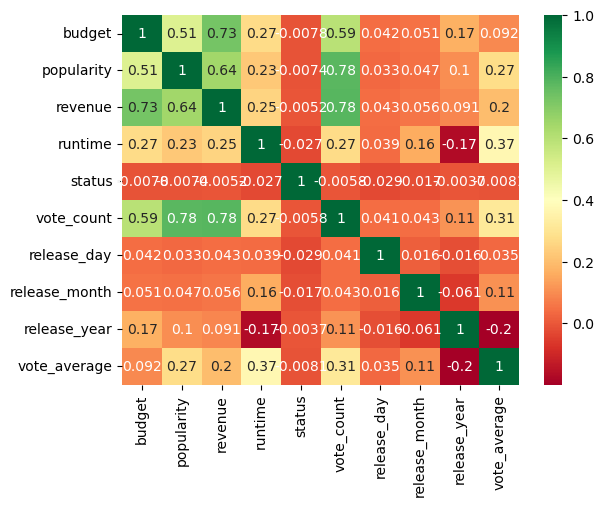

In [68]:
#correlation of all feature
sns.heatmap(data=new_df.corr(),annot=True,cmap='RdYlGn')

### Machine Learning

split features and target

In [133]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

#split training and testing data

In [115]:
skf=StratifiedKFold(n_splits=5)

In [134]:
y=round(y,0)

In [132]:
y.ndim

1

In [117]:
 for train_index,test_index in skf.split(x,y):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

feature scaling

In [118]:
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

feature importance

In [80]:
from sklearn.ensemble import ExtraTreesClassifier

In [81]:
feat=ExtraTreesClassifier()

In [83]:
feat.fit(x,y)

ExtraTreesClassifier()

In [84]:
feat.feature_importances_

array([0.12059139, 0.1389333 , 0.0997219 , 0.1522509 , 0.00136228,
       0.15869219, 0.10994543, 0.09038986, 0.12811275])

<Axes: >

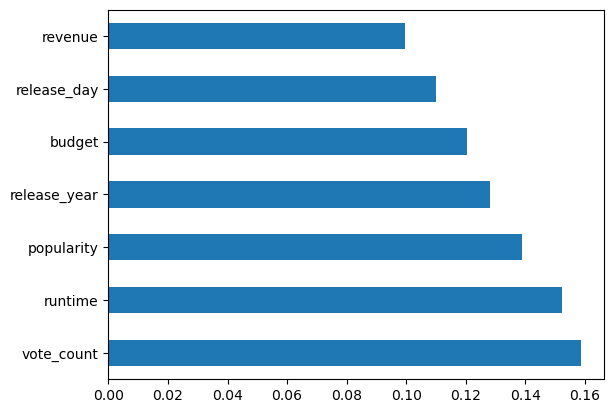

In [85]:
feat_imp=pd.Series(feat.feature_importances_,index=x.columns)
feat_imp.nlargest(7).plot(kind="barh")

choosing the model

In [87]:
knn=KNeighborsClassifier(n_jobs=5)

trained the model

In [88]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=5)

Testing the model

In [89]:
y_pred=knn.predict(x_test)

In [91]:
#create new DataFrame between Actual value and Predicted Value 
target=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

<Axes: >

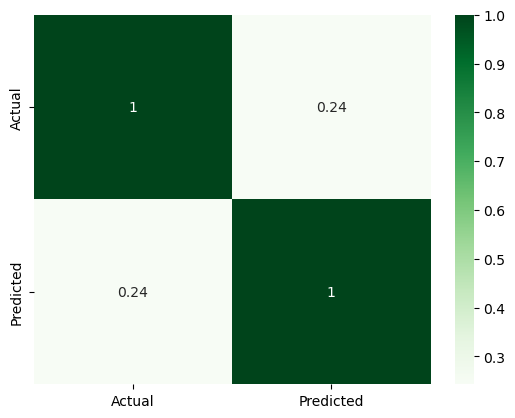

In [92]:
#Show the correlation between Actual value and predicted Value 
sns.heatmap(data=target.corr(),annot=True,cmap='Greens')

cofusion matrix

In [93]:
confusion_matrix(y_test,y_pred)

array([[  1,   0,   0,   0,   5,   6,   1,   0,   0],
       [  0,   0,   0,   0,   1,   1,   0,   0,   0],
       [  1,   0,   0,   0,   1,   7,   0,   0,   0],
       [  4,   0,   0,   3,   4,  24,   4,   0,   0],
       [  4,   0,   0,   2,  20,  89,  21,   0,   0],
       [  3,   1,   2,   6,  57, 254,  90,   2,   0],
       [  0,   0,   0,   2,  24, 135, 102,  15,   0],
       [  1,   0,   0,   1,   8,  27,  13,  16,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [94]:
accuracy_score(y_test,y_pred)

0.4129301355578728

Hyper Parameter Tuning 

In [99]:
lis=[i for i in range(3,100) if i%2!=0]

In [100]:
acc=[]
dic={}
for i in lis:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc.append(accuracy_score(y_test,y_pred))
    dic[i]=accuracy_score(y_test,y_pred)
print(max(acc))

0.47340980187695514


In [101]:
dic

{3: 0.3680917622523462,
 5: 0.4129301355578728,
 7: 0.4118873826903024,
 9: 0.43899895724713245,
 11: 0.4483837330552659,
 13: 0.44004171011470283,
 15: 0.44525547445255476,
 17: 0.443169968717414,
 19: 0.4473409801876955,
 21: 0.44004171011470283,
 23: 0.4504692387904067,
 25: 0.4556830031282586,
 27: 0.45359749739311783,
 29: 0.45881126173096975,
 31: 0.45255474452554745,
 33: 0.4504692387904067,
 35: 0.45151199165797706,
 37: 0.45359749739311783,
 39: 0.45881126173096975,
 41: 0.45776850886339937,
 43: 0.45255474452554745,
 45: 0.45151199165797706,
 47: 0.45359749739311783,
 49: 0.45881126173096975,
 51: 0.4556830031282586,
 53: 0.4629822732012513,
 55: 0.4640250260688217,
 57: 0.4608967674661105,
 59: 0.45985401459854014,
 61: 0.45881126173096975,
 63: 0.45776850886339937,
 65: 0.4619395203336809,
 67: 0.456725755995829,
 69: 0.4608967674661105,
 71: 0.4629822732012513,
 73: 0.4619395203336809,
 75: 0.4692387904066736,
 77: 0.46506777893639206,
 79: 0.4629822732012513,
 81: 0.46923

Again Hyper Parmeter tuning

In [103]:
lis=[i for i in range(100,200) if i%2!=0]

In [104]:
acc=[]
dic={}
for i in lis:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc.append(accuracy_score(y_test,y_pred))
    dic[i]=accuracy_score(y_test,y_pred)
print(max(acc))

0.4765380604796663


In [105]:
dic

{101: 0.4681960375391032,
 103: 0.4640250260688217,
 105: 0.4619395203336809,
 107: 0.46506777893639206,
 109: 0.46506777893639206,
 111: 0.46715328467153283,
 113: 0.46715328467153283,
 115: 0.46715328467153283,
 117: 0.4681960375391032,
 119: 0.4681960375391032,
 121: 0.4754953076120959,
 123: 0.4744525547445255,
 125: 0.47340980187695514,
 127: 0.4754953076120959,
 129: 0.47340980187695514,
 131: 0.47236704900938475,
 133: 0.4744525547445255,
 135: 0.4754953076120959,
 137: 0.4754953076120959,
 139: 0.47236704900938475,
 141: 0.4765380604796663,
 143: 0.4744525547445255,
 145: 0.470281543274244,
 147: 0.4692387904066736,
 149: 0.47236704900938475,
 151: 0.4744525547445255,
 153: 0.47132429614181437,
 155: 0.47132429614181437,
 157: 0.4681960375391032,
 159: 0.46715328467153283,
 161: 0.47340980187695514,
 163: 0.4744525547445255,
 165: 0.4744525547445255,
 167: 0.47236704900938475,
 169: 0.470281543274244,
 171: 0.4692387904066736,
 173: 0.4692387904066736,
 175: 0.4681960375391032,

## Without Features scaling

In [106]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [107]:
skf=StratifiedKFold(n_splits=5)

In [109]:
y=round(y,0)

In [110]:
 for train_index,test_index in skf.split(x,y):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

In [111]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=199)

In [112]:
y_pred=knn.predict(x_test)

In [113]:
accuracy_score(y_test,y_pred)

0.41605839416058393